Linear Regression

## Introduction

The goal is to make you familiar with deep learning and in order to do so we will implement a very naive algorithm to solve a **linear regression** problem: **Grid Search**.

## Linear Regression

Linear regression is one of the simplest and also most widely used machine learning algorithms. It is used to model the relationship between a dependent variable $y$ and one or more independent (also called explanatory) variables $x$. Here, we will focus on the case where we just have a single indepenedent variable, so-called **simple linear regression**.

Given some inputs $x = \{x_0, \dots, x_n\}$ and corresponding outputs $y = \{y_0, \dots, y_n\}$. Linear regression assumes that there exists an (unknown!) linear relationship between the input and the output, i.e.

$$y = f(x) = \beta_0 + \beta_1x + \epsilon$$

where $\epsilon$ is an unobserved noise variable. This relationship is approximated as

$$\hat{y} = \hat{f}(x; w_0, w_1) = w_0 + w_1x$$.

Hence, the goal of linear regression is to estimate the unknown parameters $w_0$ and $w_1$ such that the error between the model prediction $\hat{y}$ and the true output $y$ is minimized. Formaly, let the ith **residual** be

$$r_i = y_i - \hat{f}(x_i; w_0, w_1)$$

i.e. the difference between the ith output and the ith prediction and let

$$S = \sum\limits_{i=1}^n r_i^2$$

be the sum of squared residuals. Then one tries to find the paramaters $w_0$ and $w_1$ that minimize

$$MSE = \frac{1}{n}~S$$

the so called **mean squared error**.

### 1. Fitting a Linear Regression Model

In this part we will implement several functions which will help you to fit a simple linear regression model on training data using grid search.

#### Implement a loss function which measures the average squared difference between the true data and the model prediction, i.e the mean squared error (MSE).

In [1]:
# We will make use of numpy to vectorize most of the computations
import numpy as np

In [3]:
def loss(y, prediction):
    """
    :param y: The true outputs
    :param prediction: The predictions of your model
    :return: The MSE between the model predictions and the true outputs
    """
    error = y - prediction
    mse = (error * error).sum() * 1 / y.size
    
    return mse


#### Now implement a function which describes a linear relationship between the input and output.

In [4]:
def linear_model(intercept, slope, x):
    """
    :param intercept: The model intercept
    :param slope: The model slope
    :return: The model prediction on x
    """
    prediction = slope * x + intercept
    return prediction


#### Given different values for the slope and the intercept of your model. Implement a function which returns those that result in the best fit, i.e. minimizes the difference between the true data and the model prediction.

In [6]:
def grid_search(intercepts, slopes, x, y):
    """
    :param intercepts: A numpy array of different intercepts
    :param slopes: A numpy array of different slopes
    :param x: The inputs
    :param y: The true outputs
    :return (intercept, slope): The intercept and slope that result in the best fit
    """
    bestIntercept, bestSlope = 0, 0;
    lowestError = np.inf;
    
    for i in range(0, intercepts.size):
        for j in range(0, slopes.size):
            error = loss(y, linear_model(intercepts[i, 0], slopes[j, 0], x))
            if(error < lowestError):
                lowestError = error
                bestIntercept = intercepts[i, 0]
                bestSlope = slopes[j, 0]
    print ('Error: ', lowestError)
    
    return (bestIntercept, bestSlope)


#### Now Fit a linear model over some training data and plot the resulting model using matplotlib.

In [7]:
# We will use the datasets functionality provided by sklearn to generate some training data
from sklearn.datasets import make_regression, make_classification

# Let's create some training data to fit our model on
x_train, y_train = make_regression(n_samples=50, n_features=1, n_informative=1, noise=30.0)
y_train = y_train[:, None] #  make y a column vector

In [8]:
# This is the test data on which we want to evaluate our fitted model
x_test = np.linspace(start=-4, stop=4, num=20)
x_test = x_test[:, None] #  make x_test a column vector

In [9]:
# These are the different values for the intercept and slope on which we want to perform a gridsearch
intercepts = np.linspace(start=-10.0, stop=10.0, num=50)
intercepts = intercepts[:, None] #  make intercepts a column vector
slopes = np.linspace(start=0.0, stop=100.0, num=50)
slopes = slopes[:, None] #  make slopes a column vector

**Write code to fit a linear model on $x_{train}$.**

In [11]:
bestIntercept, bestSlope = grid_search(intercepts, slopes, x_train, y_train)
print('Intercept: ', bestIntercept)
print('Slope: ', bestSlope)

Error:  1208.4581495836583
Intercept:  1.8367346938775508
Slope:  10.204081632653061


**Complete the code below to plot the training data together with the fitted linear model.**

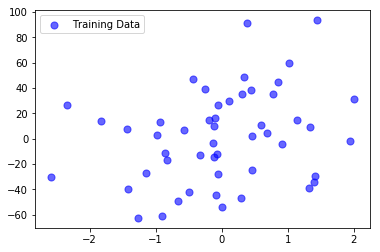

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a matplotlib figure for the training data and our fitted linear regression model
fig, axes = plt.subplots(1, 1)
axes.scatter(x_train, y_train, color='blue', marker='.', alpha=.6, s=2e2, label='Training Data')
axes.legend(loc='upper left');
